# Feature Transformations
Python Notebook to accompany a Towards Data Science article on Feature Transformations.

1. An example of currency conversion as feature transformation
2. Principle Components Analysis (PCA) from `first principles`
3. Principle Components Analysis in `scikit learn`
4. Linear Discriminant Analysis in `scikit learn`

### Currency Conversion
The `cur` array represents three sets of debts in $ and £.   
The `er` array contains the exchange rates to €.

In [1]:
import numpy as np

cur = np.array([[5,15],
                [15,20],
                [20,35]])

er = np.array([1.15,0.93])

cur.dot(er)

array([19.7 , 35.85, 55.55])

### PCA from first principles

In [2]:
import pandas as pd
TT_df = pd.read_csv('HarryPotterTT.csv')
Y_df = TT_df.copy()
Y_df.head(20)

,Name,Magic,Cunning,Courage,Wisdom,Temper
0,Harry,62,21,42,26,7
1,Hermione,60,16,40,73,2
2,Ron Weasley,45,14,40,22,4
3,Prof D,105,24,39,82,0
4,Snape,85,24,19,71,7
5,Prof McG,95,19,29,76,5
6,Moody,82,20,35,69,5
7,Hagrid,12,11,30,8,7
8,Fred W,87,13,30,22,4
9,George W,87,13,30,22,4


In [3]:
# Drop the Name column
names = Y_df.pop('Name')
# Applying N(0,1) scaling: subtract mean, divide by std deviation.
Z_df = (Y_df - Y_df.mean())/Y_df.std()
Z = Z_df.values
Z_T = Z.transpose()

In [4]:
# Get the covariance matrix
C = Z_T.dot(Z)/(Z.shape[0]-1)
C

array([[ 1.        ,  0.55115896,  0.36453448,  0.7785219 , -0.09438799],
       [ 0.55115896,  1.        ,  0.11704699,  0.49743316,  0.40345093],
       [ 0.36453448,  0.11704699,  1.        ,  0.38823344, -0.49402934],
       [ 0.7785219 ,  0.49743316,  0.38823344,  1.        , -0.23629779],
       [-0.09438799,  0.40345093, -0.49402934, -0.23629779,  1.        ]])

In [5]:
# Perform the eigendecomposition
ev, evec = np.linalg.eig(C)
ev/ev.sum()

array([0.48877025, 0.31551511, 0.10842469, 0.03713814, 0.0501518 ])

In [6]:
# Select the first two eigenvectors (PCs)
P = evec[:,0:2]
P

array([[-0.57407296, -0.10834723],
       [-0.40754714, -0.52231617],
       [-0.3846298 ,  0.44046049],
       [-0.57788956, -0.0043925 ],
       [ 0.14983036, -0.72209553]])

In [7]:
# Project the data in Z into two dimensions
X_dash = Z.dot(P)

### Plot the data in 2D

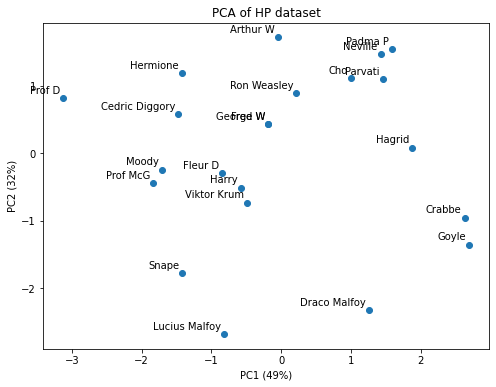

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

labels = names

plt.scatter(X_dash[:, 0], X_dash[:, 1])

for label, xi, yi in zip(labels, X_dash[:, 0], X_dash[:, 1]):
    plt.annotate(
        label,
        xy=(xi, yi), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

plt.xlabel('PC1 (49%)')
plt.ylabel('PC2 (32%)')
plt.title('PCA of HP dataset')
plt.savefig('HP2D.png')
plt.show()

### PCA in scikit-learn
We can use the implementation of PCA in `scikit-learn` to do this more easily. 

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
TT_df = pd.read_csv('HarryPotterTT.csv')

Y_d = TT_df.pop('Name').values
X = Y_df.values
X_scal = StandardScaler().fit_transform(X)

In [10]:
pcaHP = PCA(n_components=2)
X_r = pcaHP.fit(X_scal).transform(X_scal)
pcaHP.explained_variance_ratio_

array([0.48877025, 0.31551511])

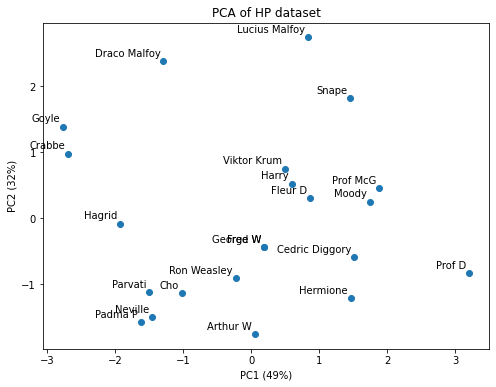

In [11]:
plt.figure(figsize=(8,6))

labels = names

plt.scatter(X_r[:, 0], X_r[:, 1])

for label, xi, yi in zip(labels, X_r[:, 0], X_r[:, 1]):
    plt.annotate(
        label,
        xy=(xi, yi), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

plt.xlabel('PC1 (49%)')
plt.ylabel('PC2 (32%)')
plt.title('PCA of HP dataset')
plt.savefig('HP2D.png')
plt.show()

### Linear Discriminant Analysis (LDA)
LDA is a *supervised* feature transformation method that takes class labels into account. 
- First we load the penguins dataset.
- We show how PCA on this dataset does not separate the classes.
- We show that LDA does a good job of separating the classes.

In [12]:
from collections import Counter
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
penguins_df = pd.read_csv('penguins.csv', index_col = 0)
y = penguins_df.pop('species').values
X = penguins_df.values

scaler = StandardScaler()
X_scl = scaler.fit_transform(X)

feature_names = penguins_df.columns
print(penguins_df.shape)
penguins_df.head()

(333, 4)


,bill_length,bill_depth,flipper_length,body_mass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [14]:
# Perform PCA on the penguins data
pca = PCA(n_components=2)
X_pca = pca.fit(X_scl).transform(X_scl)
pca.explained_variance_ratio_

array([0.68633893, 0.19452929])

In [15]:
colors = ['navy', 'turquoise', 'darkorange']

types = list(Counter(y).keys())
types

['Adelie', 'Gentoo', 'Chinstrap']

In [16]:
# Perform LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
X_lda = lda.transform(X)
X_lda.shape

(333, 2)

### Plot both PCA and LDA

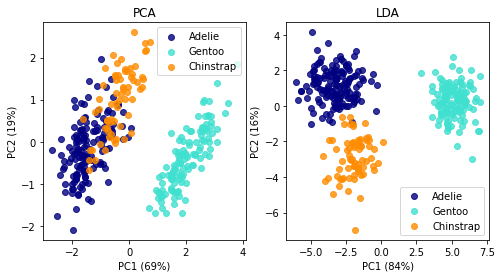

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

for color, target_name in zip(colors, types):
    ax1.scatter(X_pca[y == target_name, 0], X_pca[y == target_name, 1], 
                color=color, alpha=.8, label=target_name)

ax1.legend(loc='best', shadow=False, scatterpoints=1)

ax1.set_xlabel('PC1 (69%)')
ax1.set_ylabel('PC2 (19%)')
ax1.set_title('PCA')

for color, target_name in zip(colors, types):
    ax2.scatter(X_lda[y == target_name, 0], X_lda[y == target_name, 1], 
                color=color, alpha=.8, label=target_name)

ax2.legend(loc='lower right', shadow=False, scatterpoints=1)

ax2.set_xlabel('PC1 (84%)')
ax2.set_ylabel('PC2 (16%)')
ax2.set_title('LDA')

fig.savefig('PCA-LDA.png')